# TP1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#%matplotlib qt # para hacer los graficos en nuevas ventanas

# Punto 1

In [2]:
df = pd.read_csv("lm-2021-python\ArchivosCSV\presion_tp1.csv", header=None) # Con header=None indico que el .csv no tiene cabecera, para que no tome el primer valor como nombre de columna y se pierda
S1 = df[0].to_numpy() # Convierto la columna 0 del DataFrame en un array de numpy para poder realizarle la transformada de fourier

Fs = 500
Ts = 1 / Fs

L = len(S1)
k = np.arange(0, L)
t = k * Ts

rf = Fs / (L - 1)
f = k * rf

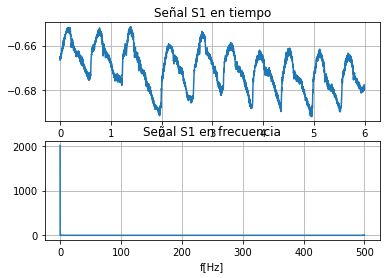

In [3]:
plt.subplot(2, 1, 1)
plt.title('Señal S1 en tiempo')
plt.plot(t, S1)
plt.grid()
plt.xlabel("t[s]")

pf=abs(np.fft.fft(S1))

plt.subplot(2, 1, 2)
plt.title('Señal S1 en frecuencia')
plt.plot(f, pf)
plt.grid()
plt.xlabel("f[Hz]")

plt.show()

# Punto 2

G=(3.2-0.1)/(1-(-1))=3.1/2=1.55

k=(3.3-0)/2=1.65V

Tendria que ir un filtro analogico de pasa bajos

In [4]:
Vmax_sensor=1
Vmin_sensor=-1

Vmax_adc=3.3
Vmin_adc=0

G = (Vmax_adc - Vmin_adc) / (Vmax_sensor-Vmin_sensor)
offset = (Vmax_adc - Vmin_adc) / 2

S2 = S1 * G + offset

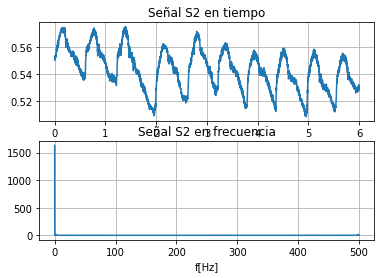

In [5]:
plt.subplot(2, 1, 1)
plt.title('Señal S2 en tiempo')
plt.plot(t, S2)
plt.grid()
plt.xlabel("t[s]")

S2_tf=abs(np.fft.fft(S2))

plt.subplot(2, 1, 2)
plt.title('Señal S2 en frecuencia')
plt.plot(f, S2_tf)
plt.grid()
plt.xlabel("f[Hz]")

plt.show()

# Punto 3
## ES EL PUNTO QUE HAY QUE ENTREGAR

error=cuantificada - original

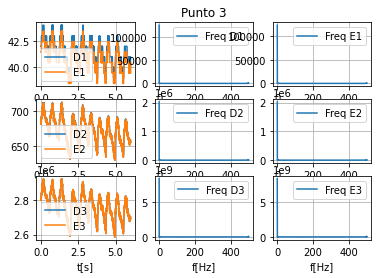

In [6]:
def cuantificar(x, n, vm_adc):
	
	""" Retorna la señal cuantificada
	### Parametros:
	* x:	  señal a cuantificar 
	* n:	  número de bits del ADC
	* vm_adc: voltaje maximo del ADC
	"""

	D_max = (2**n)-1
	return np.fix(x * (D_max / vm_adc))

def error(S, D):
	
	""" Retorna el error
	### Parametros:
	* S: Señal original
	* D: Señal cuantificada
	"""
	
	return (D - S)

def graficarSP(nf: int, nc: int, i: int, x, y, l: str, xl: str):

	""" Crea el subplot a graficar
	### Parametros:
	* nf: Número filas del subplot
	* nc: Número columnas del subplot
	* i:  Index del subplot
	* x:  Tiempo o frecuencia
	* y:  Señal a graficar 
	* l:  Nombre de la señal
	* xl: Nombre del eje x t[s] o f[s]
	"""
	
	plt.subplot(nf, nc, i)
	plt.plot(x, y, label=l)
	plt.xlabel(xl)
	plt.legend()
	plt.grid(True)
	return

# S2 ---> D1 (8 bits)

N1 = 8
D1 = cuantificar(S2, N1, Vmax_adc)
graficarSP(3,3,1,t,D1,'D1','t[s]')

D1_tf=abs(np.fft.fft(D1))
graficarSP(3,3,2,f,D1_tf,'Freq D1','f[Hz]')
plt.title('Punto 3')

E1=error(S2, D1)
graficarSP(3,3,1,t,E1,'E1','t[s]')

E1_tf=abs(np.fft.fft(E1))
graficarSP(3,3,3,f,E1_tf,'Freq E1','f[Hz]')

# S2 ---> D2 (12 bits)

N2 = 12
D2 = cuantificar(S2, N2, Vmax_adc)
graficarSP(3,3,4,t,D2,'D2','t[s]')

D2_tf=abs(np.fft.fft(D2))
graficarSP(3,3,5,f,D2_tf,'Freq D2','f[Hz]')

E2=error(S2, D2)
graficarSP(3,3,4,t,E2,'E2','t[s]')

E2_tf=abs(np.fft.fft(E2))
graficarSP(3,3,6,f,E2_tf,'Freq E2','f[Hz]')

# S3 ---> D3 (24 bits)

N3 = 24
D3 = cuantificar(S2, N3, Vmax_adc)
graficarSP(3,3,7,t,D3,'D3','t[s]')

D3_tf=abs(np.fft.fft(D3))
graficarSP(3,3,8,f,D3_tf,'Freq D3','f[Hz]')

E3=error(S2, D3)
graficarSP(3,3,7,t,E3,'E3','t[s]')

E3_tf=abs(np.fft.fft(E3))
graficarSP(3,3,9,f,E3_tf,'Freq E3','f[Hz]')

plt.show()